In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [46]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')


In [47]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

In [48]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)



In [49]:
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])


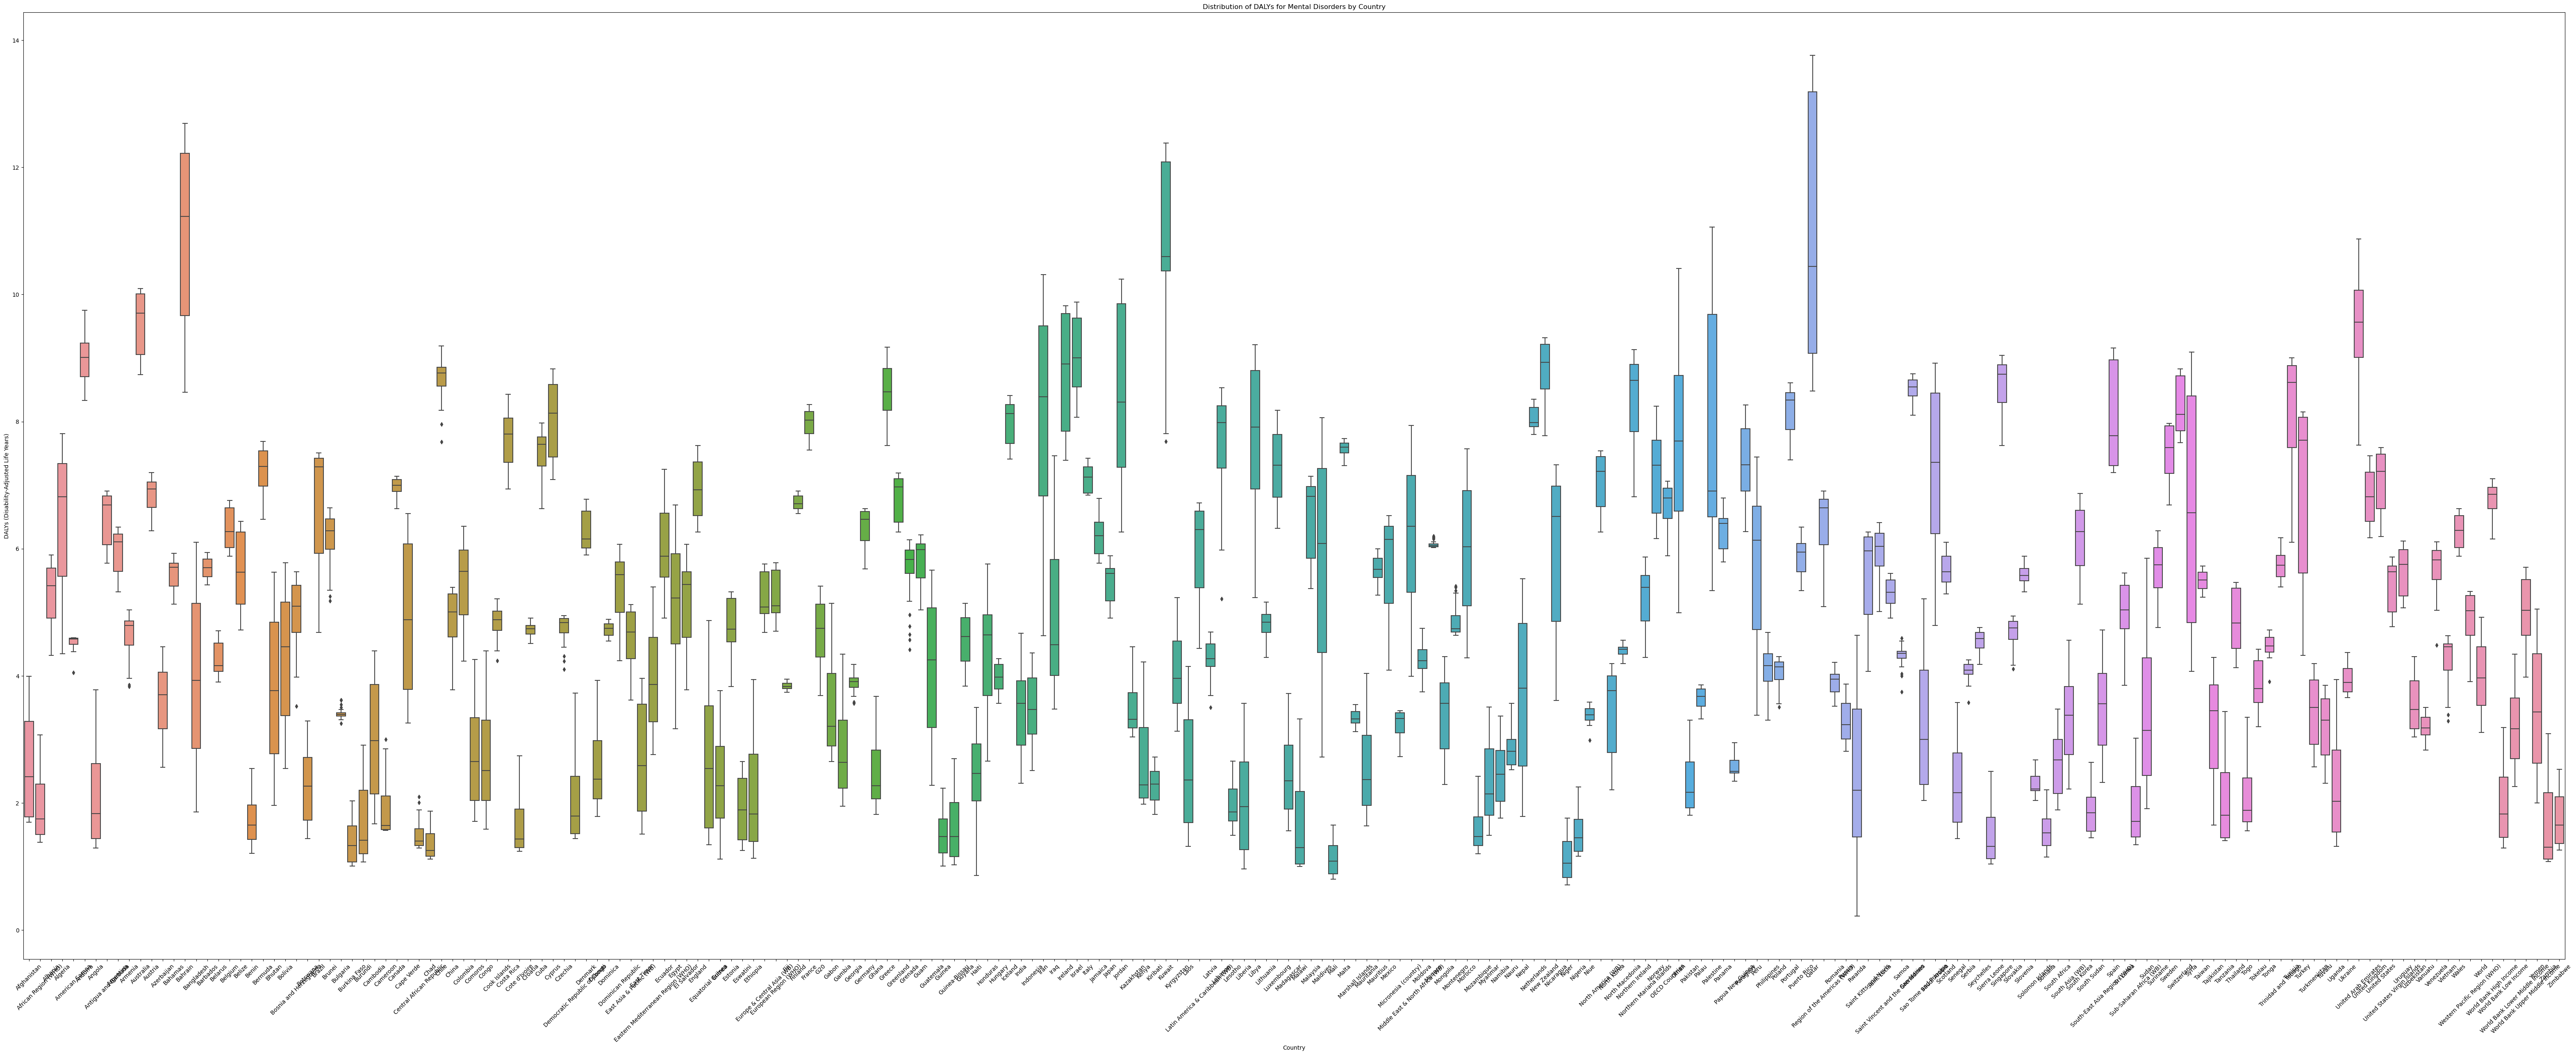

In [60]:
plt.figure(figsize=(80,30))
sns.boxplot(data=merged_df, x="Entity", y="DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("DALYs (Disability-Adjusted Life Years)")
plt.title("Distribution of DALYs for Mental Disorders by Country")
plt.show()


<Figure size 2000x1600 with 0 Axes>

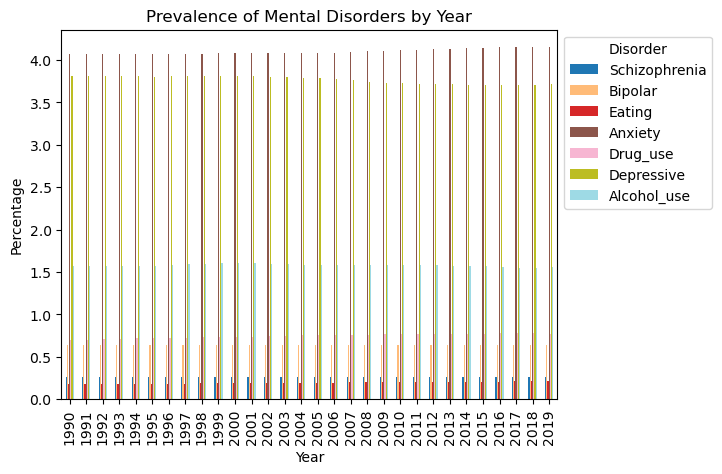

In [66]:
# Rename the columns for easier use in visualizations
merged_df = merged_df.rename(columns={
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "Schizophrenia",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "Bipolar",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "Eating",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "Anxiety",
    "Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)": "Drug_use",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "Depressive",
    "Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)": "Alcohol_use"
})

# Group by year and calculate the mean for each disorder
df_grouped = merged_df.groupby("Year")[["Schizophrenia", "Bipolar", "Eating", "Anxiety", "Drug_use", "Depressive", "Alcohol_use"]].mean()

# Plot the data
plt.figure(figsize=(20, 16))
df_grouped.plot(kind="bar", cmap="tab20")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Prevalence of Mental Disorders by Year")
plt.legend(title="Disorder", bbox_to_anchor=(1, 1))
plt.show()



In [7]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

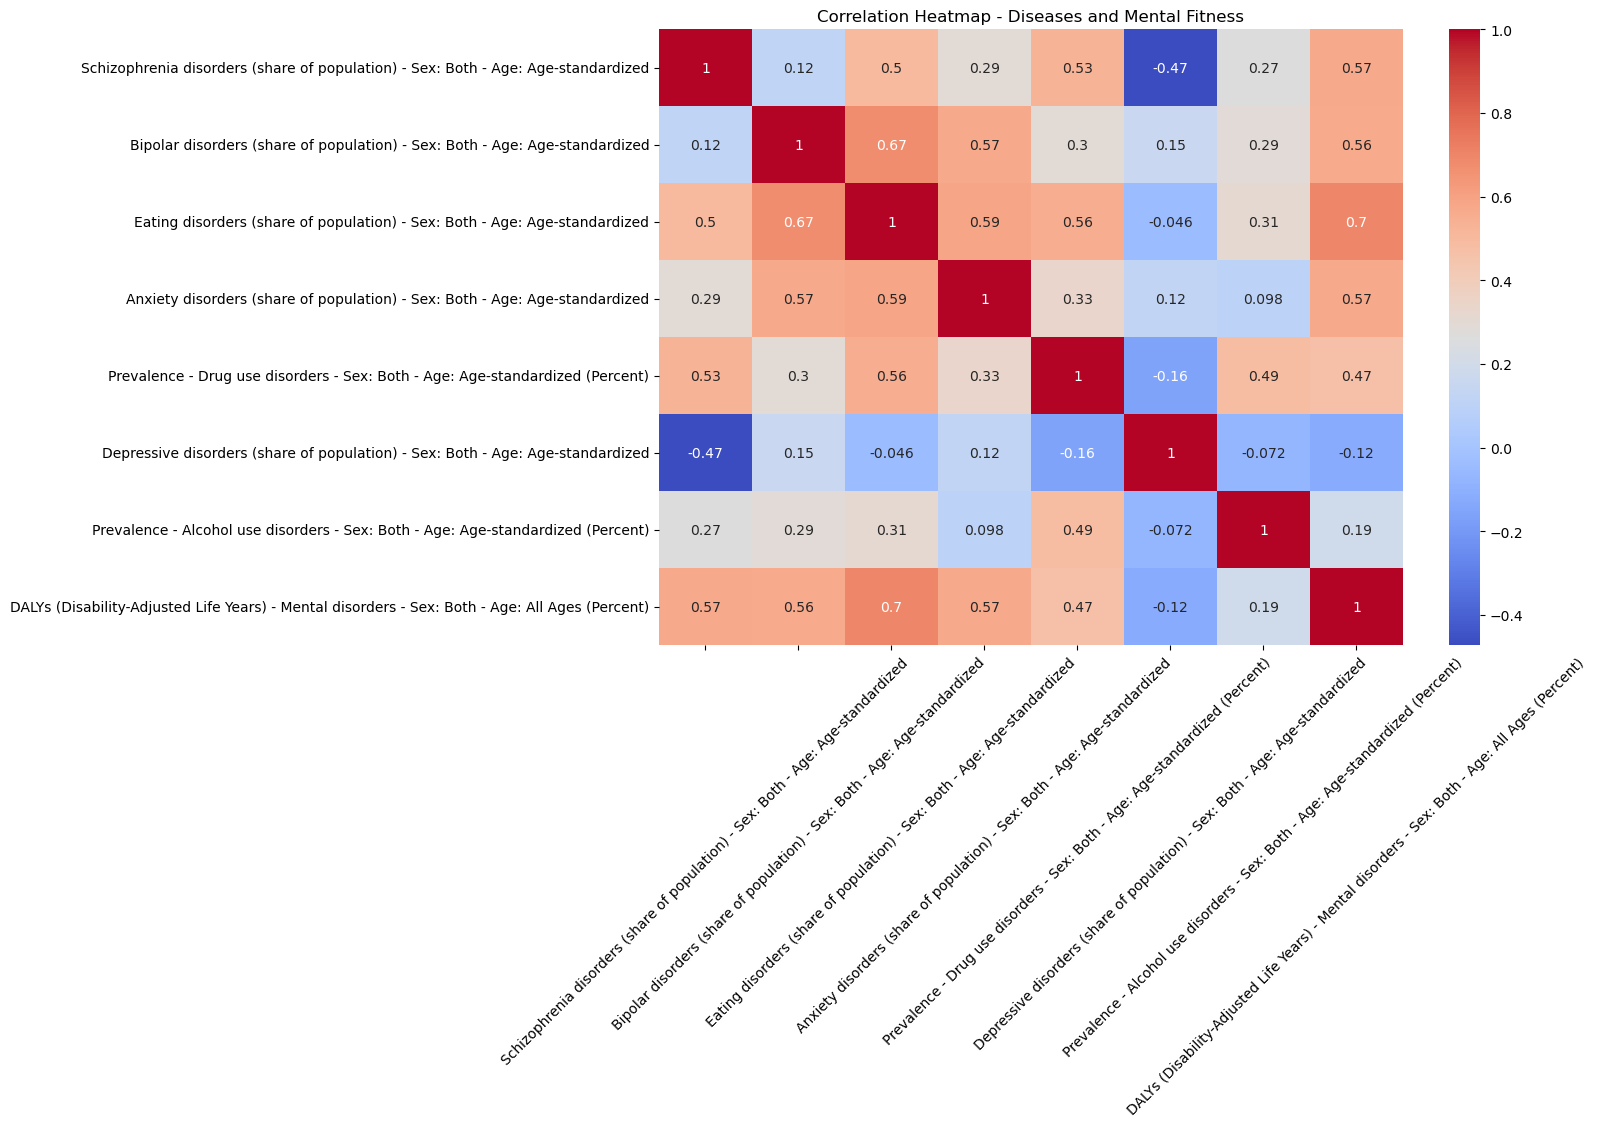

In [9]:
corr_matrix = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [30]:
# Assuming you have split your data into X_train, X_test, y_train, y_test
model_performance = {}



# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
X_poly_test = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Print the model performances
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()


Model: Polynomial Regression
   Mean Squared Error (MSE): 1.1568022548912313
   R-squared Score: 0.7735392101864447

Model: Decision Tree Regression
   Mean Squared Error (MSE): 0.18889184450129956
   R-squared Score: 0.9630216866242833

Model: Random Forest Regression
   Mean Squared Error (MSE): 0.0752498693281493
   R-squared Score: 0.9852687485960842

Model: Support Vector Regression
   Mean Squared Error (MSE): 1.7461862488419986
   R-squared Score: 0.6581587601491059

Model: XGBoost Regression
   Mean Squared Error (MSE): 0.10148741123716505
   R-squared Score: 0.9801323698949199

Model: K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.10949680701754386
   R-squared Score: 0.9785644147092478

Model: Bayesian Regression
   Mean Squared Error (MSE): 1.8759157254998438
   R-squared Score: 0.6327623368435539

Model: Neural Network Regression
   Mean Squared Error (MSE): 0.7816992314309015
   R-squared Score: 0.8469710578467571

Model: Gradient Boosting Regression
   Mean

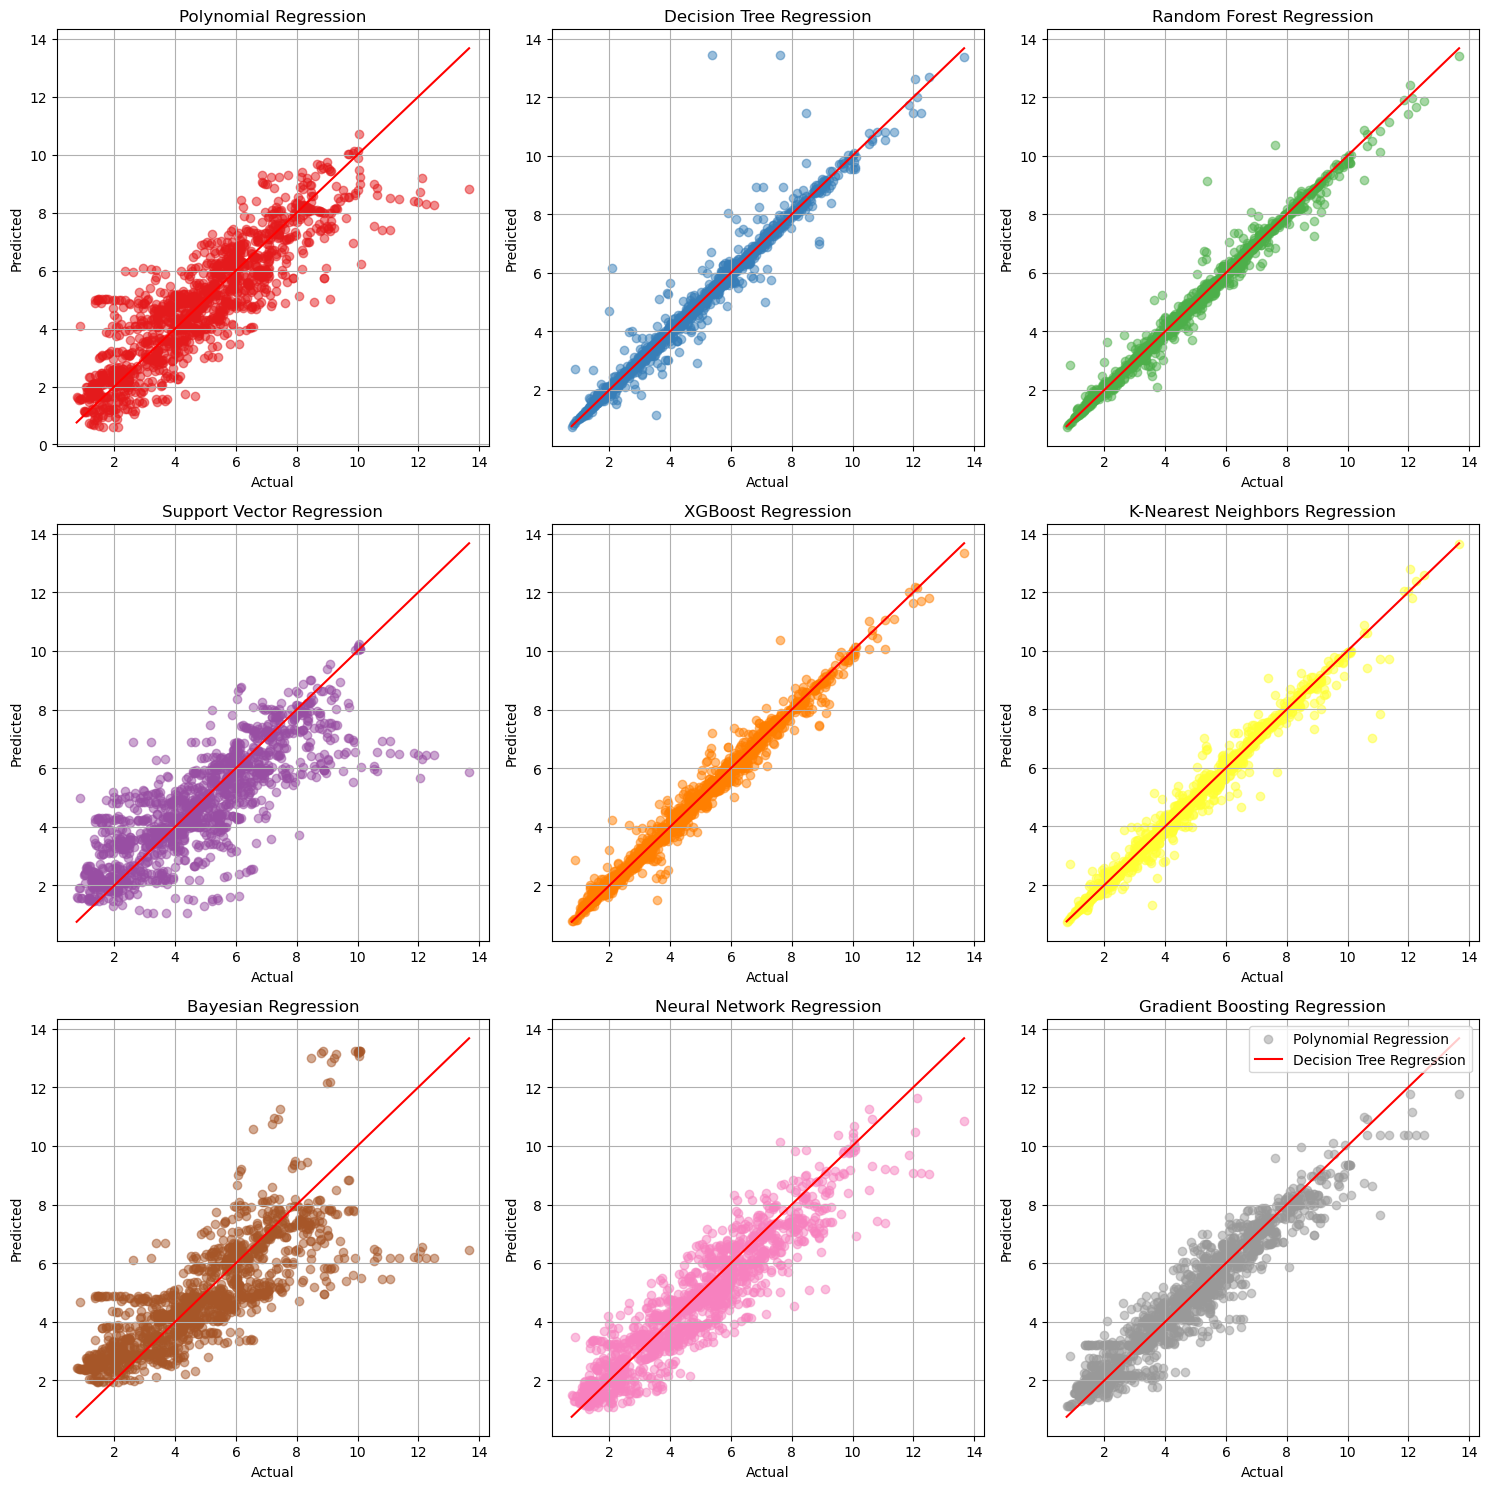

In [31]:
model_performance = {
    
   
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

In [36]:
import numpy as np

regression_scores = {
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test}
}

# Calculate the mean squared error for each model and use it for sorting
sorted_models = sorted(
    regression_scores.items(),
    key=lambda x: (np.mean((x[1]['Predicted'] - x[1]['Actual'])**2), -np.mean((x[1]['Actual']))),
    reverse=True
)

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model} - MSE: {np.mean((scores['Predicted'] - scores['Actual'])**2)}")


Regression Models in Order of Precision:
1. Bayesian Regression - MSE: 1.8759157254998438
2. Support Vector Regression - MSE: 1.7461862488419986
3. Polynomial Regression - MSE: 1.1568022548912313
4. Neural Network Regression - MSE: 0.7816992314309015
5. Gradient Boosting Regression - MSE: 0.45767209737431674
6. Decision Tree Regression - MSE: 0.18889184450129956
7. K-Nearest Neighbors Regression - MSE: 0.10949680701754386
8. XGBoost Regression - MSE: 0.10148741123716505
9. Random Forest Regression - MSE: 0.0752498693281493


In [39]:
merged_df

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.70,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,1.73,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,1.79,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,1.78,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,1.71,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45
...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.19,0.201042,0.538596,0.095652,3.184012,0.60,3.407624,1.73
6836,Zimbabwe,ZWE,2016,2.28,0.201319,0.538593,0.096662,3.187148,0.60,3.410755,1.69
6837,Zimbabwe,ZWE,2017,2.36,0.201639,0.538589,0.097330,3.188418,0.61,3.411965,1.65
6838,Zimbabwe,ZWE,2018,2.47,0.201976,0.538585,0.097909,3.172111,0.61,3.406929,1.69
